##  Sobel算子

### 理论部分:
<font size = 3>边缘是像素值发生跃迁的位置，是图像的显著特征之一<br>实际应用中效率比canny边缘检测效率高,对抗噪声能力较强，但边缘不如canny检测的准确<br>sobel算子对图像一阶求导，一阶导数越大，说明像素再该方向的变化越大，边缘信号越强 
<br>图像的灰度值都是离散的数字，sobel采用离散差分算子计算图像像素点亮度值的近似梯度<br>图像是二维的，即沿着宽度、高度两个方向--->我们用两个卷积核对原图像进行处理</font>

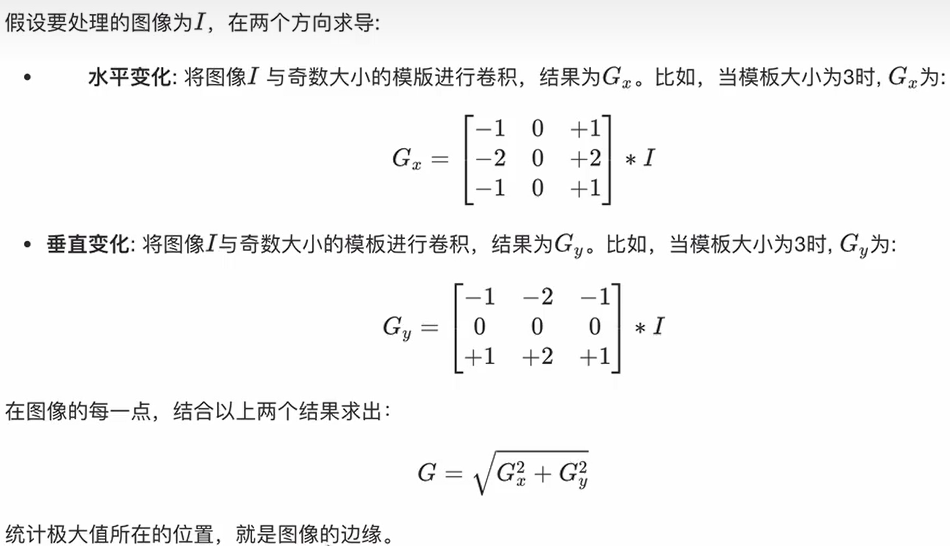

### 函数
<font size = 4> Sobel_x_or_y = cv2.Sobel(src,ddepth,dx,dy,dst,ksize,scale,delta,borderType)  </font><br>
<font size = 3> src:传入的图像<br>
ddepth:图像的深度(指储存每个像素所用的位数，也用于度量图像的色彩分辨率，它决定了彩色图像中可能出现的最多颜色数，或灰度图像中最大灰度等级)<br>
dx和dy:指求导的阶数，0表示这个方向上没有求导，取值为0和1<br>
ksize:是Sobel算子(即卷积核)的大小，必须为奇数(默认为3)如果ksize = -1，那么会演变为3x3的Scharr算子<br>
scale:缩放导数的比例常数，默认没有伸缩常数<br>
borderType:图像边界的模式，默认为cv2.BORDER_DEFAULT</font>

<font size = 3> (S|U|F)–S–代表—signed int—有符号整形<br>
U–代表–unsigned int–无符号整形<br>
F–代表–float---------单精度浮点型<br>
CV_8U - 8位无符号整数（0…255）<br>
CV_8S - 8位有符号整数（-128…127）<br>
CV_16U - 16位无符号整数（0…65535）<br>
CV_16S - 16位有符号整数（-32768…32767）<br>
CV_32S - 32位有符号整数（-2147483648…2147483647）<br>
CV_32F - 32位浮点数（-FLT_MAX…FLT_MAX，INF，NAN）<br>
CV_64F - 64位浮点数（-DBL_MAX…DBL_MAX，INF，NAN）<br>
C<number_of_channels>----代表—一张图片的通道数,比如:<br>
-1–代表与源图像的通道数一致<br>
1–灰度图片–是单通道图像<br>
2–RGB彩色图像–是3通道图像<br>
3–带Alph通道的RGB图像–是4通道图像<br>
这里的1、2、3代表的是通道数，比如RGB就是3通道，颜色表示最大为255,所以可以用CV_8UC3这个数据类型来表示;灰度图就是C1，只有一个通道；而带alph通道的PNG图像就是C4，是4通道图片。</font>

<font size = 3>注：<br>
Sobel算子算完以后会有负值，还有大于255的值，而原图像的深度是uint8，即八位无符号数，所以Sobel建立的图像位数不够，会有截断<br>
因此需要使用16位有符号的数据类型，即cv2.CV_16S。处理完图像后再将类型转换回uint8，否则图像会无法显示</font>

### Example:

In [1]:
import cv2
import numpy as np
img = cv2.imread('./1.aidaishu.jpg')
img = cv2.resize(img,(378,504))
#计算sobel卷积的结果
x = cv2.Sobel(img,cv2.CV_16S,1,0)  #计算x轴方向的梯度，只有垂直方向的边缘
y = cv2.Sobel(img,cv2.CV_16S,0,1)  #计算y轴方向的梯度，只有水平方向的边缘
#数据转换
Scale_absX = cv2.convertScaleAbs(x)
Scale_absY = cv2.convertScaleAbs(y)
#结果合成
result_c = cv2.addWeighted(Scale_absX,0.5,Scale_absY,0.5,0)

In [2]:
img_gray = cv2.cvtColor(img,code = cv2.COLOR_BGR2GRAY)    
x_g = cv2.Sobel(img_gray,cv2.CV_16S,1,0)                 #对灰度图进行卷积
y_g = cv2.Sobel(img_gray,cv2.CV_16S,0,1)
Scale_absX_g = cv2.convertScaleAbs(x_g)
Scale_absY_g = cv2.convertScaleAbs(y_g)
result_g = cv2.addWeighted(Scale_absX_g,0.5,Scale_absY_g,0.5,0)

In [3]:
cv2.imshow('result_c',np.hstack((img,result_c)))
cv2.imshow('result_g',result_g)
cv2.waitKey()
cv2.destroyAllWindows()

## Scharr算子

<font size = 3>Scharr算子只能作用于大小为3的内核，该函数的运算与Sobel函数一样快，但结果却更加精确，  <br>
    它采用了不同的kernel，放大了像素变换的情况<br>
由于Scharr算子只支持3x3，所以没有kernel这个参数了</font>

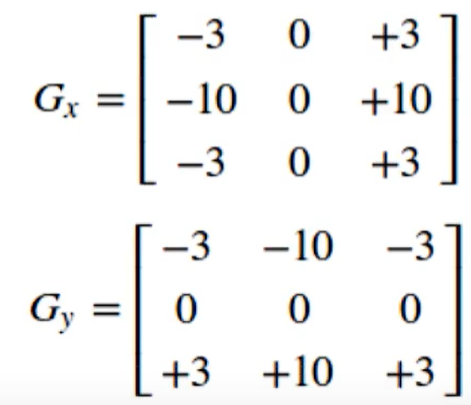

<font size = 3>  Scharr擅长找比较细的边缘，使用的较少<br>
Sobel算子的ksize设置为-1就是Scharr算子<br>
Scharr算子只能求x方向或者y方向的边缘</font>

In [4]:
x_s = cv2.Scharr(img,cv2.CV_64F,dx = 1,dy = 0)
y_s = cv2.Scharr(img,cv2.CV_64F,dx = 0,dy = 1)
img_Scharr = cv2.addWeighted(x_s,0.5,y_s,0.5,gamma = 0)
cv2.imshow('Scharr',img_Scharr)
cv2.waitKey()
cv2.destroyAllWindows()

## 拉普拉斯算子

<font size=3> 下面是Sobel算子模拟异界求导的过程，可以发现导数越大的地方变化越剧烈--->很有可能是边缘</font>

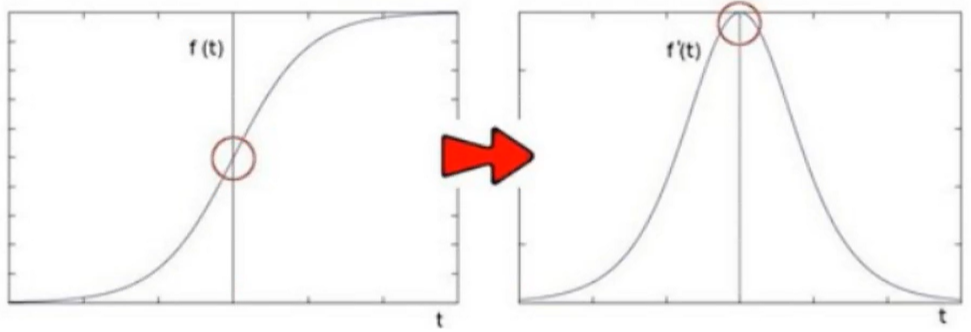

<font size = 3>继续求二阶导:</font>

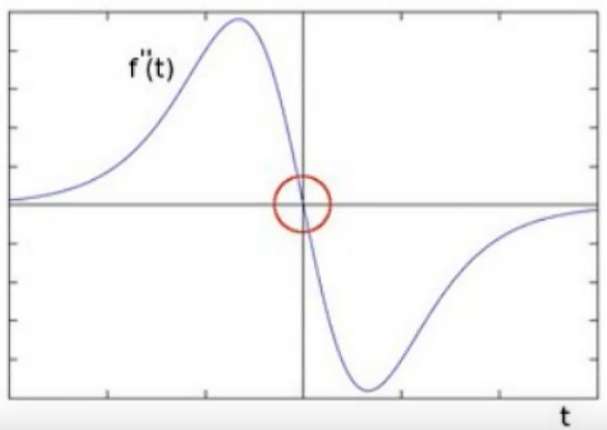

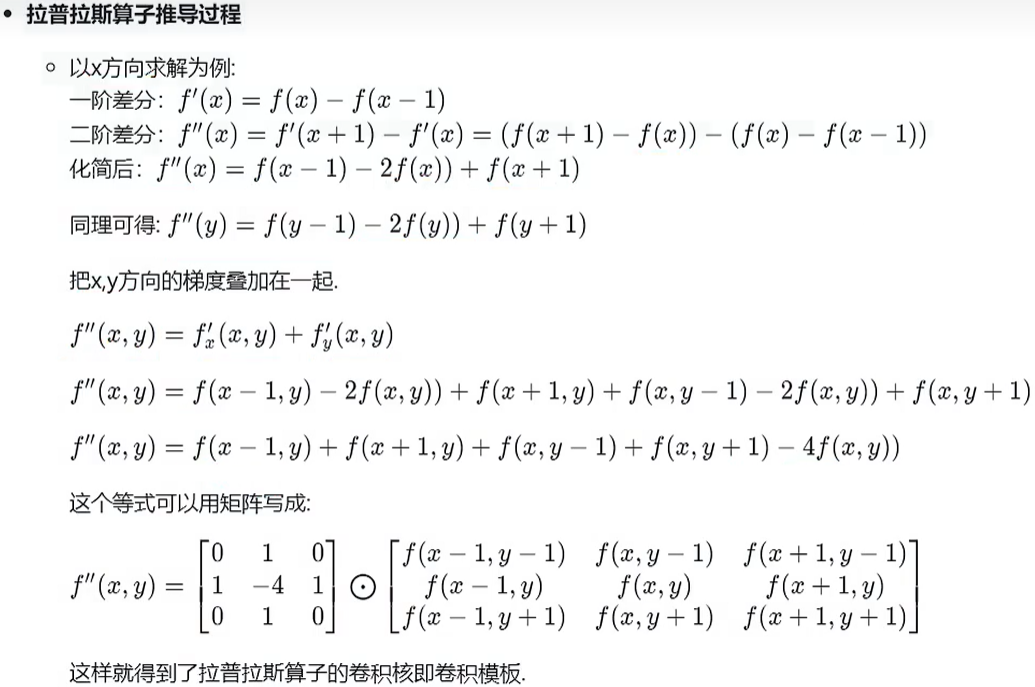

<font size = 4> Laplacian(src,ddepth,[,dst[,ksize[,scale[],scale[,delta[,borderType]]]]]) </font><br>
<font size = 3> 可以同时求两个方向的边缘<br>
拉普拉斯算子对噪声较敏感，一般需要先去噪再用拉普拉斯算子</font>

In [5]:
img_lap = cv2.Laplacian(img,-1,ksize = 3)   #拉普拉斯算子进行卷积

In [9]:
cv2.imshow('img and Sobel',np.hstack((img,result_c)))
cv2.imshow('Sobel_Gray',result_g)
cv2.imshow('Scharr and Laplacian',np.hstack((img_Scharr,img_lap)))
cv2.waitKey()
cv2.destroyAllWindows()